<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load and Prepare Data

In [2]:
data = pd.read_csv(r"F:\JUPYTER\notbook\trainingn\csv\mansori\train.csv").drop(columns=['casual','registered'])
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## EDA

missing data
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64


unique values
[ 16  40  32  13   1   2   3   8  14  36  56  84  94 106 110  93  67  35
  37  34  28  39  17   9   6  20  53  70  75  59  74  76  65  30  22  31
   5  64 154  88  44  51  61  77  72 157  52  12   4 179 100  42  57  78
  97  63  83 212 182 112  54  48  11  33 195 115  46  79  71  62  89 190
 169 132  43  19  95 219 122  45  86 172 163  69  23   7 210 134  73  50
  87 187 123  15  25  98 102  55  10  49  82  92  41  38 188  47 178 155
  24  18  27  99 217 130 136  29 128  81  68 139 137 202  60 162 144 158
 117  90 159 101 118 129  26 104  91 113 105  21  80 125 133 197 109 161
 135 116 176 168 108 103 175 147  96 220 127 205 174 121 230  66 114 216
 243 152 199  58 166 170 165 160 140 211 120 145 256 126 223  85 206 124
 255 222 285 146 274 272 185 191 232 327 224 107 119 196 171 214 242

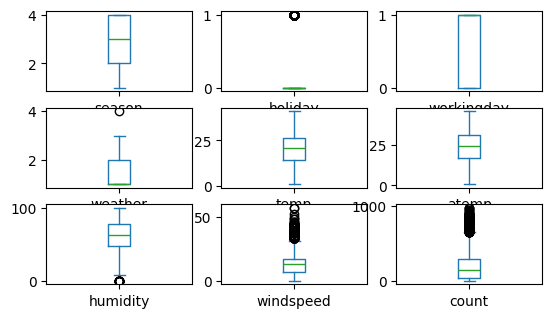

In [3]:
print('missing data')
missing_data = data.isnull().sum()
print(missing_data)

print('\n'*1)
print('unique values')
for i in data.columns:
    unique_values = data[i].unique()
print(unique_values)

print('\n'*1)
print('duplicates data')
duplicates = data.duplicated()
print(duplicates.sum())

print('\n'*1)
data.dtypes

print('\n')
data.plot( kind='box', subplots=True , layout= (4,3) , sharex=False , sharey=False)
plt.show()

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

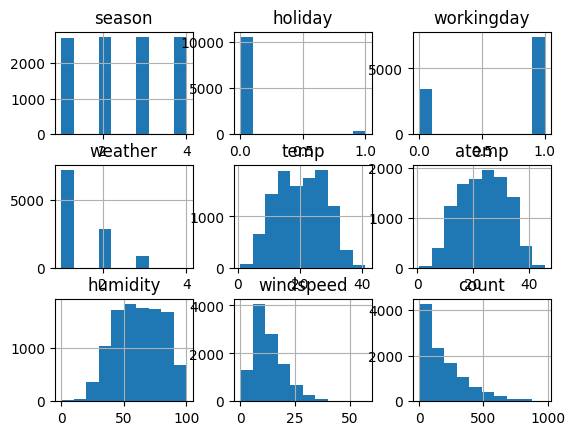

In [5]:
data.hist()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\

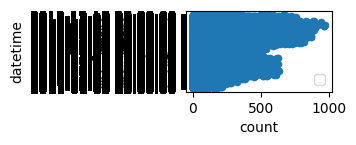

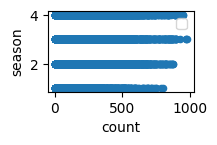

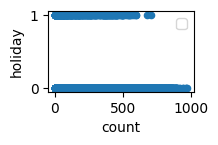

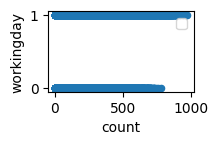

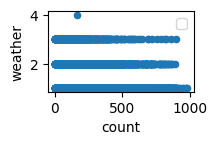

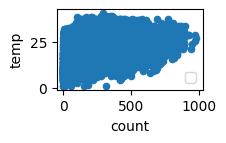

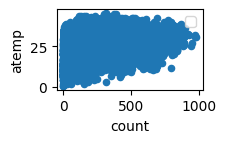

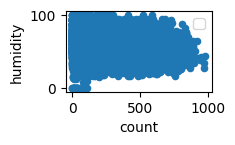

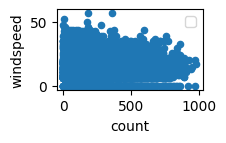

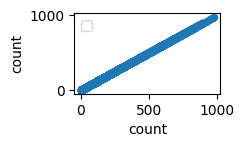

In [6]:
for i in data.columns:
    data.plot( kind='scatter',y=i,x='count', subplots=True , layout= (4,3) , sharex=False , sharey=False)


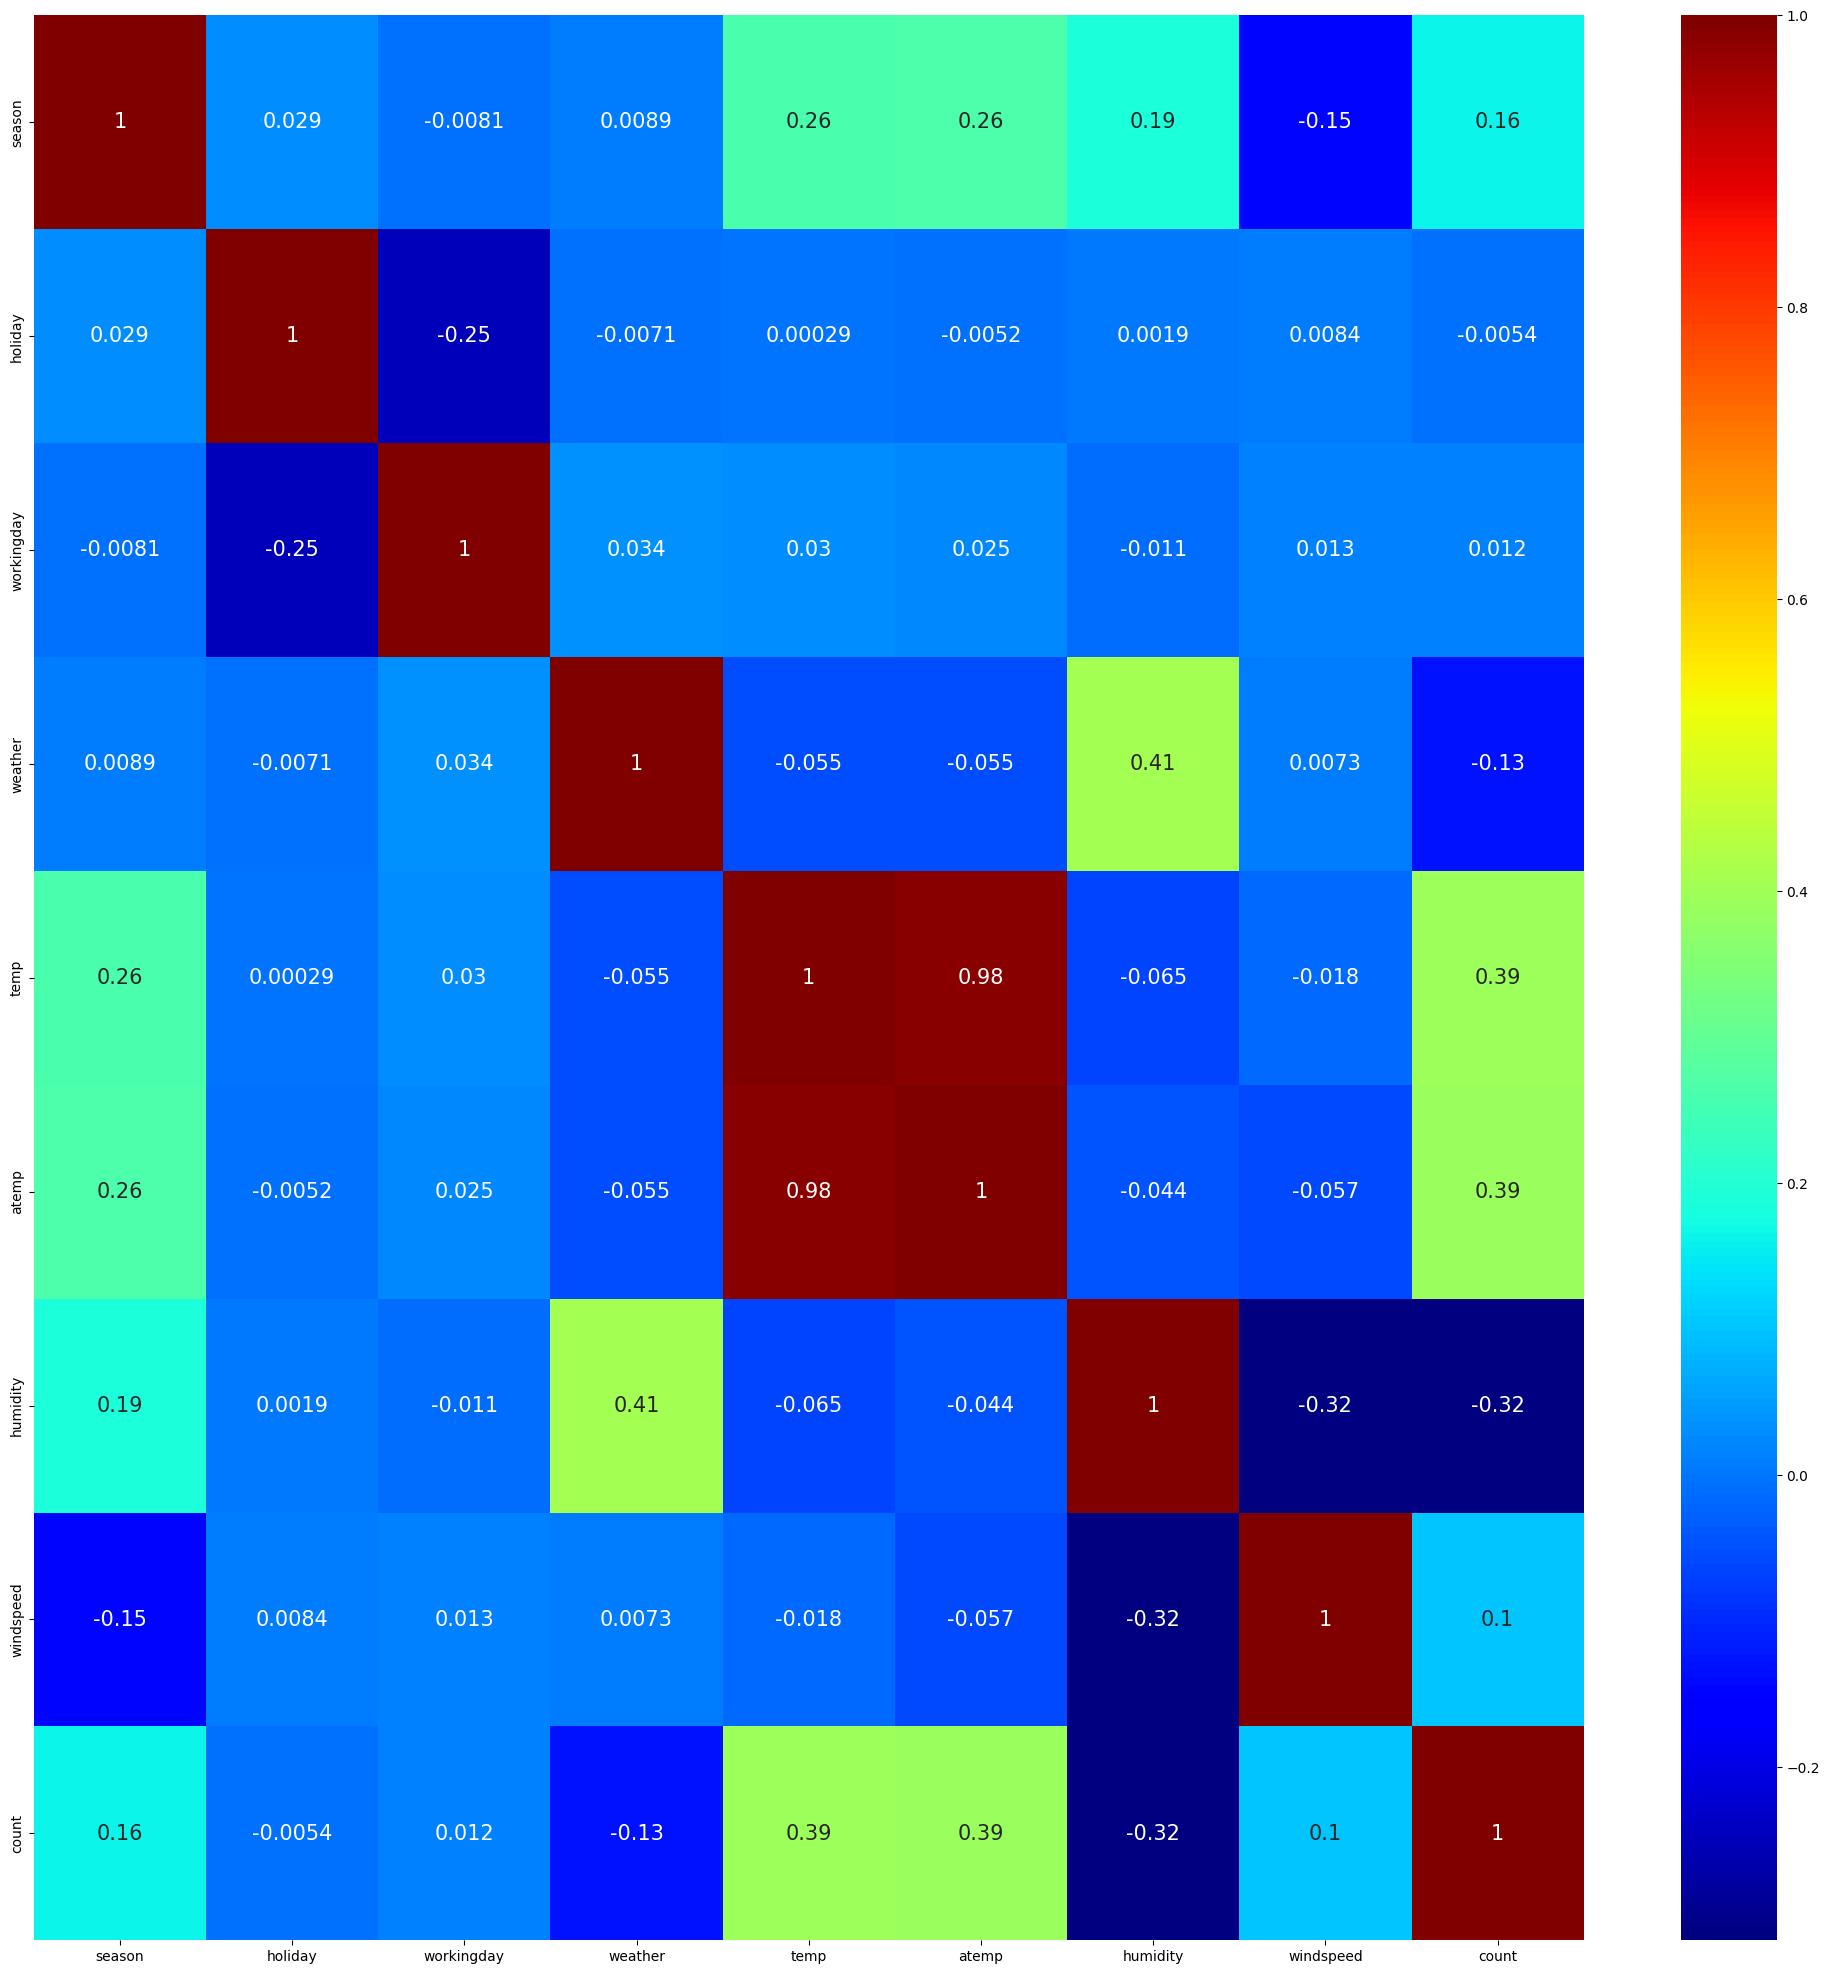

In [7]:
correlation =(data.drop(columns=['datetime'], axis=1)).corr()
plt.figure(figsize=(25,25))
sns.heatmap(data=correlation ,  cmap='jet', annot=True, annot_kws={'size':15})
plt.show()

In [8]:
#sns.pairplot((data.drop(columns=['datetime'] , axis=1)))


## Data Preprocessing

In [9]:
from sklearn import preprocessing

X = data.drop(columns=['count' ,'datetime']).values
y = data['count'].values

x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (8708, 8) (8708,)
Test set: (2178, 8) (2178,)


## Strorytelling - Visualization

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 10)
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(np.mean(scores))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:77

## Train your model (Regression)

In [11]:
best_k = k_values[np.argmax(cross_val_scores)]
knn= KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

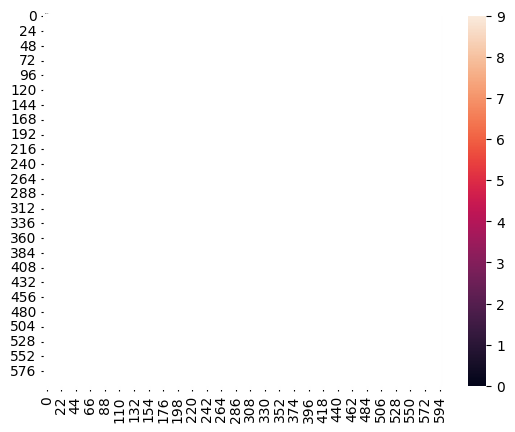

Accuracy: 0.01147842056932966 



F1 Score (weighted): 0.005265406037676129 



Confusion Matrix: 



Classification Report: 



              precision    recall  f1-score   support

           1       0.05      0.29      0.08        21
           2       0.02      0.07      0.02        30
           3       0.01      0.05      0.01        20
           4       0.02      0.10      0.04        31
           5       0.05      0.20      0.08        41
           6       0.01      0.03      0.01        32
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        10
      

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [12]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}",3*'\n')
print(f"F1 Score (weighted): {f1}",3*'\n')
print("Confusion Matrix:",3*'\n')
print("Classification Report:",3*'\n')
print(class_report,3*'\n')

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
dTree


DecisionTreeClassifier(max_depth=4)

In [15]:
dTree.fit(X_train,y_train)
predTree = dTree.predict(X_test)


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.017447199265381085


## Test Result

In [17]:
n_data=pd.read_csv(r"F:\JUPYTER\notbook\trainingn\csv\mansori\test.csv")
re=dTree.predict(n_data.drop(columns=['datetime']))
re

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

## Send us the Result (Maktabkhoone)